<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/01_PyTorch_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch란?)
- PyTorch는 머신러닝 프레임워크 입니다.
  - PyTorch의 Tensor는 Numpy배열과 매우 흡사합니다.
- PyTorch를 사용하면 GPU 연동을 통해 효율적으로 딥러닝 모델을 학습할 수 있습니다.

In [ ]:
import torch

## 1) GPU 사용여부 체크하기
- Colab 기준 **[수정 - 노트설정 - 하드웨어 가속기]**를 GPU로 바꿔줍니다.

GPU
- 모델의 학습(미분-역전파), 추론(내적)에 사용한다.
- 추론(내적)용 GPU가 따로 존재한다.(기업용)
- CPU도 해당 연산을 실행할 수 있지만, 단순한 계산 능력이 많이 필요한 작업이기 때문에 CPU 보다 단순 계산을 많이 할 수 있는 GPU를 사용하는게 적합함.
- GPU는 고성능 연산 처리 장치로, 계산 능력이 CPU 보다는 뛰어나지만 계산을 하는 자원이 많지는 않다.
- tensor 라는 배열에서 VRAM에 들어가게 되면, GPU를 사용해야 함.

CPU
- Data를 불러내서 시각화하고, 분석한다.
- tensor 라는 배열에서 RAM에 들어가게 되면, CPU를 사용해야 함.


In [ ]:
data = [[1, 2],
        [3, 4]]

x = torch.tensor(data)
print(x.is_cuda)

# Tensor를 GPU로 옮기기
x = x.cuda()
print(x.is_cuda)

# Tensor를 CPU로 옮기기
x = x.cpu()
print(x.is_cuda)

False
True
False


서로 다른 장치(device)에 있는 텐서끼리 연산을 수행하면 오류가 발생합니다.

# 텐서 생성하기
- PyTorch의 텐서(tensor)는 기능적으로 넘파이(numpy)와 매우 유사합니다.
- 기본적으로 **다차원 배열**을 처리하기에 적합한 자료구조로 이해할 수 있습니다.
- PyTorch의 텐서는 **"자동 미분"**기능을 제공합니다.

## 1) 텐서의 속성
- 텐서의 기본 속성은 다음과 같습니다.
  - 모양(shape)
  - 자료형(data type)
  - 저장된 장치(device)

In [ ]:
tensor = torch.rand(3, 4)

print(tensor)
print(f"Shape : {tensor.shape}")
print(f"Data Type : {tensor.dtype}")
print(f"Device : {tensor.device}")

tensor([[0.1684, 0.3716, 0.3932, 0.5118],
        [0.1809, 0.0949, 0.0939, 0.8040],
        [0.6314, 0.8918, 0.4972, 0.7828]])
Shape : torch.Size([3, 4])
Data Type : torch.float32
Device : cpu


## 2) 텐서 생성하기
- 파이썬의 `list`에서 직접 텐서를 생성할 수 있습니다.

In [ ]:
data = [[1, 2],
        [3, 4]]

x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


- numpy 배열에서 텐서를 생성할 수 있습니다.

In [ ]:
a = torch.tensor([5])
b = torch.tensor([7])

c = (a + b).numpy()
print(type(c))

<class 'numpy.ndarray'>


In [ ]:
result = c * 10
tensor = torch.from_numpy(result)
print(tensor)
print(type(tensor))

tensor([120])
<class 'torch.Tensor'>


## 3) 다른 텐서로부터 텐서 초기화 하기
- 다른 텐서의 정보를 토대로 텐서를 초기화 할 수 있습니다.
- **텐서의 속성**이란? 모양(shape)과 자료형(data type)을 일컫습니다.

In [ ]:
x = torch.tensor([[5, 7],
                  [1, 2]])

# 텐서 x와 같은 모양을 가지지만, 값이 1인 텐서 생성하기
x_ones = torch.ones_like(x)
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [ ]:
# 텐서 x와 같은 모양을 가지지만, 자료형을 float으로, 값은 랜덤하게 채우기
x_rand = torch.rand_like(x, dtype=torch.float32) # uniform distribution [0, 1]
print(x_rand)

tensor([[0.8437, 0.3930],
        [0.2625, 0.2956]])


# 텐서의 형변환 및 차원 조작
- 텐서는 넘파이 배열처럼 조작이 가능합니다.

## 1) 텐서의 특정 차원에 접근하기
- 텐서의 원하는 차원에 접근할 수 있습니다.
- axis=0  == dim=0 이므로 가로축을 의미

In [ ]:
tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0])
print(tensor[:, 0])
print(tensor[..., -1]) # ... : 스프레드 연산. tensor의 모든 데이터를 선택

tensor([1, 2, 3, 4])
tensor([1, 5, 9])
tensor([ 4,  8, 12])


## 2) 텐서 이어붙이기
-텐서를 이어서 새로운 텐서를 만들 수 있습니다.

### 2-1) cat
단순하게 텐서를 축(dim)에 맞춰 연결합니다.

In [ ]:
tensor1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

tensor2 = torch.tensor([
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
])

# dim : 텐서의 축
# 0번 축을 기준으로 이어 붙입니다.
result = torch.cat([tensor1, tensor2], dim=0)
print(result)

print()
# 1번 축을 기준으로 이어 붙입니다.
result = torch.cat([tensor1, tensor2], dim=1)
print(result)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]])

tensor([[ 1,  2,  3,  4, 13, 14, 15, 16],
        [ 5,  6,  7,  8, 17, 18, 19, 20],
        [ 9, 10, 11, 12, 21, 22, 23, 24]])


### 2-2) stack
리스트 내의 텐서를 쌓아줍니다. 차원수가 증가합니다. 예를 들어 2차원 배열과 2차원 배열을 쌓은 3차원 배열을 만들어 줍니다.

- stack은 차원이 늘어나지만, concat은 차원이 늘어나지 않고 이어붙일 수 있다.

In [ ]:
tensor1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

tensor2 = torch.tensor([
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
])

tensor3 = torch.stack([tensor1, tensor2])
tensor3

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])

## 3) 텐서 자르기(slice)

In [ ]:
tensor1 = torch.tensor([[1,2,3,4],
                        [5,6,7,8]])

tensor2 = tensor1[:, 0]
print(tensor2)

tensor([1, 5])


In [ ]:
tensor3 = tensor1[:, 1:3:2]
print(tensor3)

tensor([[2],
        [6]])


In [ ]:
tensor3 = tensor1[0, 1:3]
print(tensor3)

tensor([2, 3])


In [ ]:
tensor1 = torch.tensor([[[1, 2],
                         [3, 4]],

                        [[5, 6],
                         [7, 8]],

                        [[9, 10],
                         [11,12]]])

print(tensor1[0])
print(tensor1[0, :])
print(tensor1[0, :, 0])

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([1, 3])


In [ ]:
print(tensor1[-1])
print(tensor1[-1, :])
print(tensor1[-1, :, :])

tensor([[ 9, 10],
        [11, 12]])
tensor([[ 9, 10],
        [11, 12]])
tensor([[ 9, 10],
        [11, 12]])


In [ ]:
print(tensor1[1:3, :, :].shape)
print(tensor1[:, 1, :].shape)
print(tensor1[:, :-1, :].shape)

torch.Size([2, 2, 2])
torch.Size([3, 2])
torch.Size([3, 1, 2])


### 3-1) split
지정한 size만큼 tensor를 쪼개어 줍니다.

In [ ]:
tensor1 = torch.rand(17, 4)

splits = tensor1.split(4, dim=0)
for s in splits:
  print(s.shape)

torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([1, 4])


### 3-2) chunk
지정한 개수만큼 쪼개어진 텐서를 만들어 냅니다.

In [ ]:
tensor1 = torch.rand(17, 4)

chunks = tensor1.chunk(4, dim=0)
for c in chunks:
  print(c.shape)

torch.Size([5, 4])
torch.Size([5, 4])
torch.Size([5, 4])
torch.Size([2, 4])


### 3-3) index_select
인덱스를 이용해 해당 위치의 텐서를 참조합니다.

In [ ]:
tensor1 = torch.tensor([[[1, 2],
                         [3, 4]],

                        [[5, 6],
                         [7, 8]],

                        [[9, 10],
                         [11,12]]])

indice = torch.tensor([2, 0])
print(indice)

tensor2 = tensor1.index_select(dim=0, index=indice)
print(tensor2)

tensor([2, 0])
tensor([[[ 9, 10],
         [11, 12]],

        [[ 1,  2],
         [ 3,  4]]])


## 4) 텐서 형변환(type casting)
- 텐서의 자료형을 변환할 수 있습니다.

In [ ]:
tensor1 = torch.tensor([2], dtype=torch.int)
tensor2 = torch.tensor([5.0])

print(tensor1.dtype)
print(tensor2.dtype)

torch.int32
torch.float32


In [ ]:
print(tensor1 + tensor2)
print((tensor1 + tensor2).dtype)

tensor([7.])
torch.float32


In [ ]:
print((tensor1 + tensor2.type(torch.int)))

tensor([7], dtype=torch.int32)


## 5) 텐서의 모양 변경

### 5-1) view
- 텐서를 원하는 개수로 각 차원에 매핑하여 텐서의 차원을 시킬 수 있습니다.

In [ ]:
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
tensor2 = tensor1.view(4, 2)

print(f"tensor1 : {tensor1}")
print(f"tensor2 : {tensor2}")

tensor1 : tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor2 : tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [ ]:
# tensor1의 값을 변경하면 tensor2도 변경이 된다.
tensor1[0] = 7
print(tensor2)

tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [ ]:
# tensor1을 복사하여 변경하면 tensor1을 변경해도 tensor2는 변경이 안된다.
tensor3 = tensor1.clone().view(4, 2)
tensor1[0] = 20

print(tensor3)

tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [ ]:
# -1을 이용하면 비워져 있는 차원의 값이 적절하게 채워진다.
tensor4 = tensor1.view(-1, 4)
print(tensor4)

tensor([[20,  2,  3,  4],
        [ 5,  6,  7,  8]])


### 5-2) reshape
- view()와 비슷하나, 텐서가 메모리 상에 연속적이지 않아도(not contiguous) shape이 변경 됩니다.

In [ ]:
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
tensor2 = tensor1.reshape(4, 2)

print(f"tensor2 : {tensor2}")

tensor2 : tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


# 텐서의 연산

In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[2, 2],
                  [3, 3]])

In [ ]:
print(a + b)

tensor([[3, 4],
        [6, 7]])


In [ ]:
print(a - b)

tensor([[-1,  0],
        [ 0,  1]])


In [ ]:
print(a * b)

tensor([[ 2,  4],
        [ 9, 12]])


In [ ]:
print(a / b)

tensor([[0.5000, 1.0000],
        [1.0000, 1.3333]])


In [ ]:
print( a == b )

tensor([[False,  True],
        [ True, False]])


In [ ]:
print( a != b )

tensor([[ True, False],
        [False,  True]])


In [ ]:
print( a ** b )

tensor([[ 1,  4],
        [27, 64]])


## Inplace 연산
Inplace 연산은 텐서의 실제 값을 바꿔주는 연산을 의미합니다.

In [ ]:
print(a)
print(a.mul(b))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 2,  4],
        [ 9, 12]])
tensor([[1, 2],
        [3, 4]])


In [ ]:
# a와 b의 Element wise product를 수행한 후 도로 a에 넣습니다.
# 연산 함수 뒤에 언더바(_)가 보통 붙습니다.
print(a.mul_(b))
print(a)

tensor([[ 2,  4],
        [ 9, 12]])
tensor([[ 2,  4],
        [ 9, 12]])


## 차원 감소 연산
주로 합계나 평균 등 차원 축에 따라 연산이 된 후 감소가 되는 연산을 의미합니다.

In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float)

# 차원을 따로 지정하지 않으면 텐서 내 모든 데이터에 대한 연산이 이뤄진 후 스칼라 값으로 표현
print(a.sum())
print(a.mean())

tensor(10.)
tensor(2.5000)


In [ ]:
# 차원을 따로 지정하면, 지정한 차원에 맞게 연산
print(a.sum(dim=0))
print(a.sum(dim=1))

print()

print(a.mean(dim=0))
print(a.mean(dim=1))

tensor([4., 6.])
tensor([3., 7.])

tensor([2., 3.])
tensor([1.5000, 3.5000])


## 브로드캐스팅
차원 수가 맞지 않아도 자동으로 텐서를 높은 차원으로 확장해 연산이 가능토록 합니다.

In [ ]:
a = torch.tensor([[1, 2]])
b = torch.tensor([[3, 4]])

print(a.shape, b.shape)

torch.Size([1, 2]) torch.Size([1, 2])


In [ ]:
print(a + b)

tensor([[4, 6]])


### tensor, scalar 연산

In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]])

print(a + 10)

tensor([[11, 12],
        [13, 14]])


### tensor, vector 연산

In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([10, 20])

print(b.shape)
print(a + b)

torch.Size([2])
tensor([[11, 22],
        [13, 24]])


In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[10, 20]])
print(b.shape)
print(a + b)

torch.Size([1, 2])
tensor([[11, 22],
        [13, 24]])


In [ ]:
a = torch.tensor([[1, 2],
                  [3, 4]])

b = torch.tensor([[10],
                  [20]])
print(b.shape)
print(a + b)

torch.Size([2, 1])
tensor([[11, 12],
        [23, 24]])


### tensor, tensor 연산

In [ ]:
a = torch.tensor([[1, 2]])

b = torch.tensor([[10],
                  [20]])

print(a.shape, b.shape)
print(a + b)

torch.Size([1, 2]) torch.Size([2, 1])
tensor([[11, 12],
        [21, 22]])


In [ ]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([100, 200])

print(a+b)

tensor([[[101, 202],
         [103, 204]],

        [[105, 206],
         [107, 208]],

        [[109, 210],
         [111, 212]]])


In [ ]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([[100, 200],
                  [300, 400]])

print(a+b)

tensor([[[101, 202],
         [303, 404]],

        [[105, 206],
         [307, 408]],

        [[109, 210],
         [311, 412]]])


In [ ]:
a = torch.tensor([[[1, 2],
                   [3, 4]],

                   [[5, 6],
                    [7, 8]],

                   [[9, 10],
                    [11,12]]])

b = torch.tensor([[100],
                  [300]])

print(a+b)

tensor([[[101, 102],
         [303, 304]],

        [[105, 106],
         [307, 308]],

        [[109, 110],
         [311, 312]]])


# 파이토치의 여러 함수들

## expand
설정한 차원의 방향으로 텐서를 복사하면서 확장합니다.

In [ ]:
x = torch.tensor([[[1, 2]],
                  [[3, 4]]])

print(x.size()) # x.shape과 같다.

torch.Size([2, 1, 2])


In [ ]:
y = x.expand(2, 3, 2)
print(y)
print(y.size())

tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


In [ ]:
# 위의 expand를 cat으로 구현해 보기
z = torch.cat([x, x, x], dim=1)
print(z)
print(z.size())

tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


## randperm
설정한 숫자만큼의 무작위 순열을 만들어 냅니다.

In [ ]:
x = torch.randperm(10)

print(x)
print(x.shape)

tensor([8, 2, 0, 5, 4, 7, 3, 9, 6, 1])
torch.Size([10])


## argmax
설정한 차원에서 가장 큰 값이 들어있는 인덱스를 반환합니다.

In [ ]:
x = torch.randperm(3**3).reshape(3, 3, -1)

print(x)
print(x.size())

tensor([[[ 0, 14,  2],
         [24, 23, 18],
         [20,  9,  3]],

        [[13,  5, 17],
         [26, 16, 12],
         [ 1, 21, 10]],

        [[15, 19, 25],
         [ 4, 11,  6],
         [ 8,  7, 22]]])
torch.Size([3, 3, 3])


In [ ]:
# -1번 방향(스칼라 축)에서 가장 큰 값의 인덱스를 추출하기
y = x.argmax(dim=-1)

print(y)
print(y.size())

tensor([[1, 0, 0],
        [2, 0, 1],
        [2, 1, 2]])
torch.Size([3, 3])


In [ ]:
# 1번 방향에서 가장 큰 값의 인덱스를 추출하기
z = x.argmax(dim=1)

print(z)
print(z.size())

tensor([[1, 1, 1],
        [1, 2, 0],
        [0, 0, 0]])
torch.Size([3, 3])


## topk
가장 큰 k개의 값과, 그 값의 인덱스를 튜플 형식으로 반환합니다.

In [ ]:
values, indices = torch.topk(x, k=1, dim=-1)

print(values)
print(values.size())

tensor([[[14],
         [24],
         [20]],

        [[17],
         [26],
         [21]],

        [[25],
         [11],
         [22]]])
torch.Size([3, 3, 1])


In [ ]:
print(indices)
print(indices.size())

tensor([[[1],
         [0],
         [0]],

        [[2],
         [0],
         [1]],

        [[2],
         [1],
         [2]]])
torch.Size([3, 3, 1])


### topk를 이용해 정렬하기

In [ ]:
target_dim = -1
values, indices = torch.topk(
    x,
    k=x.size(target_dim),
    largest=True # 큰 것 부터 뽑아내기, 즉 내림차순 정렬, False로 하면 작은 것 부터 뽑아내기 때문에 오름차순이 된다.
)

print(values)

tensor([[[14,  2,  0],
         [24, 23, 18],
         [20,  9,  3]],

        [[17, 13,  5],
         [26, 16, 12],
         [21, 10,  1]],

        [[25, 19, 15],
         [11,  6,  4],
         [22,  8,  7]]])


### sort를 이용해 topk 구현하기

In [ ]:
k = 1
values, indices = torch.sort(x, dim=-1, descending=True)
values, indices = values[:, :, :k], indices[:, :, k]

print(values)

tensor([[[14],
         [24],
         [20]],

        [[17],
         [26],
         [21]],

        [[25],
         [11],
         [22]]])


## squeeze, unsqueeze

- squeeze : 개수가 하나인 차원을 삭제합니다.
- unsqueeze : 원하는 곳에 하나의 차원을 추가합니다.

In [ ]:
# squeeze
x = torch.tensor([[[1, 2],
                   [3, 4]]])

print(x)
print(x.size())

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [ ]:
print(x.squeeze())
print(x.squeeze().shape)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [ ]:
print(x.squeeze(0))
print(x.squeeze(0).shape)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [ ]:
print(x.squeeze(1))
print(x.squeeze(1).shape) # 인덱스 1번 위치에는 element가 2개 이므로 squeeze가 일어나지 않는다.

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [ ]:
# unsqueeze
x = torch.tensor([[1, 2],
                  [3, 4]])

print(x)
print(x.size())

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])


In [ ]:
print(x.unsqueeze(0))
print(x.unsqueeze(0).shape)

tensor([[[1, 2],
         [3, 4]]])
torch.Size([1, 2, 2])


In [ ]:
print(x.unsqueeze(1))
print(x.unsqueeze(1).shape)

tensor([[[1, 2]],

        [[3, 4]]])
torch.Size([2, 1, 2])


# 자동 미분
- PyTorch에서는 텐서를 연산한 후 해당 연산에 대한 미분을 자동으로 수행하는 기능을 제공합니다.
- 이 기능에 의해 딥러닝이 가능하게 됩니다.

## backward 사용하기
- 역전파(backaward)를 하기 위해 미분을 하는 과정입니다.

In [ ]:
# requires_grad=True 옵션을 이용해 텐서의 기울기를 구할 수 있도록 합니다. 즉 미분이 됩니다.
x = torch.tensor([1], requires_grad=True) # ⭐텐서의 숫자는 반드시 정수가 아닌 "실수"여야 합니다.
print(x)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [ ]:
x = torch.tensor([1.], requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


In [ ]:
# 텐서 x 제곱하여 y 텐서 생성
y = x**2
print(y) # PowBackward0 확인

tensor([1.], grad_fn=<PowBackward0>)


$x^2$를 미분하여 도함수를 구하면 $2x$가 됩니다. 이를 파이토치에서는 `backward()` 함수로 구해낼 수 있습니다.

In [ ]:
print("미분 수행 전 : ", x.grad)
y.backward() # 미분 수행
print("미분 수행 후 : ", x.grad)  # y=x^2을 미분한 2x의 x값에 1을 대입한 기울기 값. 즉 x=1일 때 x^2의 기울기

미분 수행 전 :  None
미분 수행 후 :  tensor([2.])


## 예시 1 - 중간 미분
- 일반적으로 제일 마지막 연산 과정의 미분만을 수행합니다.
  - 이 때 제일 마지막 연산 과정에 의해 등장한 텐서를 `Leaf Tensor`라고 합니다.
  - Leaf Tensor로 부터 Root Tensor의 미분 값만 확인할 수 있습니다.
- 하지만 중간 과정을 담당하는 텐서의 미분을 직접 수행하기 위해서는 `retain_grad()`를 사용합니다.

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y=x**2
print(y)

z=3*y
print(z) # MulBackward0 확인

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)


In [ ]:
# 미분 수행 1. 제일 마지막 연산인 z 부터 미분
z.backward()
print("z 미분 결과 : ", x.grad)

y.backward() # y에 대한 미분은 사용 불가. 중간 연산 과정에 대한 미분은 따로 설정이 필요함. 또한 z.grad에 의해 이미 도함수는 모든 연산 과정에서 구해진 상태!
print("y 미분 결과 : ", x.grad)

z 미분 결과 :  tensor([6.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y=x**2
print(y)
y.retain_grad() # 중간 연산 과정 텐서의 미분을 보기 위함.

z=3*y
print(z)

z.backward()
print("z에 대한 x의 변화량", x.grad)
print("z에 대한 y의 변화량", y.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
z에 대한 x의 변화량 tensor([6.])
z에 대한 y의 변화량 tensor([3.])


항상 제일 마지막 연산에서 `backward()`를 수행해야 하는건 아닙니다. 원하는 위치에서 미분을 할 수 있습니다.

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
z = 3 * y

y.backward() # y에서부터 미분을 수행.
print("y에 대한 x의 변화량 : ", x.grad)

y에 대한 x의 변화량 :  tensor([2.])


## 예시 2 - 편미분

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([1.], requires_grad=True)

z = 2*x**2 + y**2
print(z)

z.backward()

print("x의 변화량 : ", x.grad)
print("y의 변화량 : ", y.grad)

tensor([3.], grad_fn=<AddBackward0>)
x의 변화량 :  tensor([4.])
y의 변화량 :  tensor([2.])


## 예시 3 - 스칼라를 벡터로 미분

In [ ]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.sum(x ** 2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad) # 스칼라를 벡터로 미분

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


## 예시 4 - 미분 중간 취소
- 텐서를 미분 가능한 상태에서 미분이 불가능한 상태로 만듭니다 연산 중간에 `requires_grade=False`로 설정하는 것이 가능합니다.
- 보통 전이학습에서 사용되는 기법입니다.

In [ ]:
x = torch.tensor([1.], requires_grad=True)
x.requires_grad = False

print(x)
# 전이 학습(Transfer Learning)
y = x**2
print(y)
# Error!!!
# y.backward()

tensor([1.])
tensor([1.])


In [ ]:
# 또는 detach()를 사용합니다.
x = torch.tensor([2.], requires_grad=True)
x = x.detach()

print(x)
y = x**2
print(y)

tensor([2.])
tensor([4.])


In [ ]:
# torch.no_grad
x = torch.tensor([2.], requires_grad=True)

# requires_grad=False 없이 with 구문 내에서만 잠깐 미분을 하지 않도록 설정할 수 있게
with torch.no_grad():
    y = x**2
    print(x.requires_grad)
    print(y)

print(x.requires_grad)
y=x**2
print(y)

True
tensor([4.])
True
tensor([4.], grad_fn=<PowBackward0>)


# Torcchviz를 이용한 미분 과정 시각화.
- 실제 딥러닝을 훈련하는 과정을 시각화 하기 위한 툴들이 많이 있습니다.
- Torchviz는 그냥 장난감 같은 패키지 이므로, 참고만 해주세요.

In [ ]:
## torchviz를 이용한 미분 과정 시각화
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

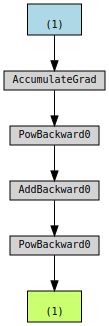

In [ ]:
from torchviz import make_dot
x = torch.tensor([1.], requires_grad=True)

make_dot((x**2 + 1)**2)